In [37]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron

import numpy as np

In [3]:
def plot3d_data(X, y):
    ax = plt.axes(projection='3d')
    ax.scatter3D(X[y == -1, 0], X[y == -1, 1], X[y == -1, 2],'b');
    ax.scatter3D(X[y == 1, 0], X[y == 1, 1], X[y == 1, 2],'r');
    plt.show()

def plot3d_data_and_decision_function(X, y, W, b):
    ax = plt.axes(projection='3d')
    # create x,y
    xx, yy = np.meshgrid(range(10), range(10))
    # calculate corresponding z
    # [x, y, z] * [coef1, coef2, coef3] + b = 0
    zz = (-W[0] * xx - W[1] * yy - b) / W[2]
    ax.plot_surface(xx, yy, zz, alpha=0.5)
    ax.scatter3D(X[y == -1, 0], X[y == -1, 1], X[y == -1, 2],'b');
    ax.scatter3D(X[y == 1, 0], X[y == 1, 1], X[y == 1, 2],'r');
    plt.show()

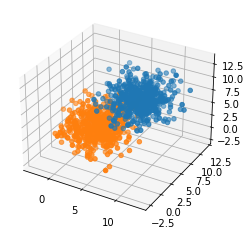

In [5]:
X = np.loadtxt('./data/3d-points/x_train.txt')
y = np.loadtxt('./data/3d-points/y_train.txt').astype(np.int64)

plot3d_data(X, y)
# incarcarea datelor de testare
X_test = np.loadtxt('./data/3d-points/x_test.txt')
y_test = np.loadtxt('./data/3d-points/y_test.txt').astype(np.int64)

In [19]:
perceptron_model = Perceptron(
    penalty=None,
    alpha=0.0001,
    fit_intercept=True,
    max_iter=1000,
    tol=1e-5,
    shuffle=True,
    eta0=0.1,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=5,
    random_state=77
)


## Ex1) perceptron antrenare

In [20]:
perceptron_model.fit(X, y)

Perceptron(early_stopping=True, eta0=0.1, random_state=77, tol=1e-05)

In [30]:
acc_train = perceptron_model.score(X, y)
acc_test = perceptron_model.score(X_test, y_test)

print(f"Accuracy for train is {acc_train}")
print(f"Accuracy for test is {acc_test}")

print(f"Model weights are: {perceptron_model.coef_}")
print(f"Model bias are: {perceptron_model.intercept_}")
print(f"Number of epochs until convergens is : {perceptron_model.n_iter_}")

Accuracy for train is 0.937
Accuracy for test is 0.945
Model weights are: [[-0.81273274 -1.79167137 -1.00019108]]
Model bias are: [19.1]
Number of epochs until convergens is : 8


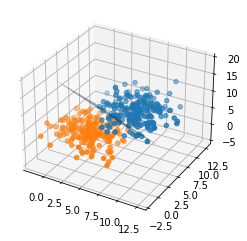

In [33]:
plot3d_data_and_decision_function(X_test, y_test, perceptron_model.coef_[0], perceptron_model.intercept_)

## Ex 2.

In [35]:
x_train = np.loadtxt('./data/MNIST/train_images.txt')
y_train = np.loadtxt('./data/MNIST/train_labels.txt').astype(np.int64)

# incarcarea datelor de testare
x_test = np.loadtxt('./data/MNIST/test_images.txt')
y_test = np.loadtxt('./data/MNIST/test_labels.txt').astype(np.int64)

In [38]:
scaler = StandardScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [39]:
mlp_classifier_model = MLPClassifier(hidden_layer_sizes=(10, 10),
                                     activation='relu', solver='sgd', alpha=0.0001, batch_size=32,
                                     learning_rate='constant', learning_rate_init=1e-2, power_t=0.5,
                                     max_iter=2000, shuffle=True, random_state=77, tol=1e-3,
                                     momentum=0.0, early_stopping=True, validation_fraction=1e-1,
                                     n_iter_no_change=10)

In [40]:
mlp_classifier_model.fit(x_train_scaled, y_train)

MLPClassifier(batch_size=32, early_stopping=True, hidden_layer_sizes=(10, 10),
              learning_rate_init=0.01, max_iter=2000, momentum=0.0,
              random_state=77, solver='sgd', tol=0.001)

In [42]:
acc_train = mlp_classifier_model.score(x_train_scaled, y_train)
acc_test = mlp_classifier_model.score(x_test_scaled, y_test)

print(f"Accuracy for train is {acc_train}")
print(f"Accuracy for test is {acc_test}")

Accuracy for train is 0.91
Accuracy for test is 0.818
